# COVID-19: Exploratory Data Analysis

------------------------------------
# Author:

- Mohamed NIANG, Data Scientist at Paris-Saclay University
-----------------------------------

#  Table of Contents

I. Exploratory data analysis and visualization using Python

    I.1. Imports and data 

    I.2. Confirmed cases of COVID-19
    
    I.3. Number of confirmed cases by country
    
    I.4. Plotting confirmed cases by country
    
    I.5. Number of reported deaths
    
    I.6. Number of reported deaths by country
    
    I.7. Aligning growth curves to start with day of number of known deaths ≥ 25
    
    I.8. Plotting number of recovered people

II. Interactive plots with altair


## Exploratory data analysis and visualization using Python

### Imports and data

Importons les packages nécessaires de la bibliothèque SciPy et obtenons [the data](https://github.com/CSSEGISandData/COVID-19).

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

In [2]:
# Data urls
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url+ 'time_series_covid19_recovered_global.csv'

# Import datasets as pandas dataframes
data_confirmed = pd.read_csv(confirmed_cases_data_url)
data_deaths = pd.read_csv(death_cases_data_url)
data_recovered = pd.read_csv(recovery_cases_data_url)

### Confirmed cases of COVID-19

Nous allons d'abord vérifier les données des cas confirmés en examinant les premières obervations sur les données :


In [3]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


**Discuss:** What do you see here?

Nous pouvons également voir beaucoup de choses sur les données en utilisant les méthodes `.info()` et `.describe()` dataframe :

In [4]:
data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [5]:
data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,...,3532.594697,3838.886364,4151.200758,4535.636364,4818.617424,5095.079545,5401.878788,5723.878788,6042.992424,6408.026515
std,24.734994,70.669996,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,...,17859.555003,19711.027486,21667.237096,23940.073183,25670.348203,27466.891516,29364.316603,31408.470549,33419.461011,35633.968667
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,19.000000,20.000000,20.750000,21.750000,24.000000,25.750000,27.750000,29.500000,32.000000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,165.500000,172.500000,183.000000,189.500000,208.500000,221.000000,232.500000,246.000000,254.500000,256.500000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,779.500000,873.000000,943.000000,980.250000,1019.500000,1049.750000,1128.750000,1189.250000,1233.750000,1269.250000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,213372.000000,243762.000000,275586.000000,308853.000000,337072.000000,366667.000000,396223.000000,429052.000000,461437.000000,496535.000000


### Number of confirmed cases by country

Regardez à nouveau la tête (ou la queue) de nos données et remarquez que chaque ligne représente les données d'une *province* ou d'un *État* particulier d'un pays donné :

In [6]:
data_confirmed.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,1,1,2,2,3,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,4,4,4,4,4,4
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,4,4,4,4,4
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Mais nous voulons les chiffres pour chaque pays. Donc, pour chaque pays, nous voulons prendre toutes les lignes (*régions / provinces*) qui correspondent à ce pays et additionner les chiffres pour chacun. Pour parler en termes d'analyse des données, nous voulons **grouper par** la colonne du pays et additionner toutes les valeurs des autres colonnes.

The `pandas` API has the `groupby` method, which allows us to do this.

In [7]:
# Group by region (also drop 'Lat', 'Long' as it doesn't make sense to sum them here)
confirmed_country = data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
Albania,0,0,0,0,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
Algeria,0,0,0,0,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
Andorra,0,0,0,0,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
Angola,0,0,0,0,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


Ainsi, chaque ligne de notre nouvelle base de données "pays confirmé" est une série chronologique du nombre de cas confirmés pour chaque pays. 
Maintenant, une trame de données a un objet associé appelé "Index", qui est essentiellement un ensemble d'identifiants uniques pour chaque ligne. Regardons l'index de `confirmed_country` :

In [8]:
confirmed_country.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=185)

Il est indexé par "Pays/Région". C'est très bien **mais** si nous indexons par date **à la place**, cela nous permettra de produire des visualisations immédiatement. C'est un bel aspect de l'API "pandas" : vous pouvez faire des visualisations de base avec elle et, si votre index est constitué de DateTimes, elle sait que vous tracez des séries temporelles et joue bien avec elles.
Pour que l'index soit l'ensemble des dates, notez que les noms des colonnes sont les dates. Pour que les noms de colonnes deviennent l'index, nous voulons essentiellement faire des colonnes les lignes (et des lignes les colonnes). Cela correspond à prendre la transposition du cadre de données :

In [9]:
confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


Jetons un coup d'œil à notre index pour voir s'il est réellement constitué de DateTimes :

In [10]:
confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20'],
      dtype='object')

Notez que `dtype='object'`ce qui signifie que ce sont des chaînes de caractères, et non des DateTimes. Nous pouvons utiliser "pandas" pour le transformer en un DateTimeIndex :

In [11]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace=True)
# Check out index
confirmed_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

Maintenant que nous disposons d'un indice DateHeure et de pays pour les colonnes, nous pouvons faire une représentation graphique pour visualiser la série chronologique du nombre de cas confirmés par pays. Comme il y a tant de pays, nous allons en tracer un sous-ensemble :

### Plotting confirmed cases by country

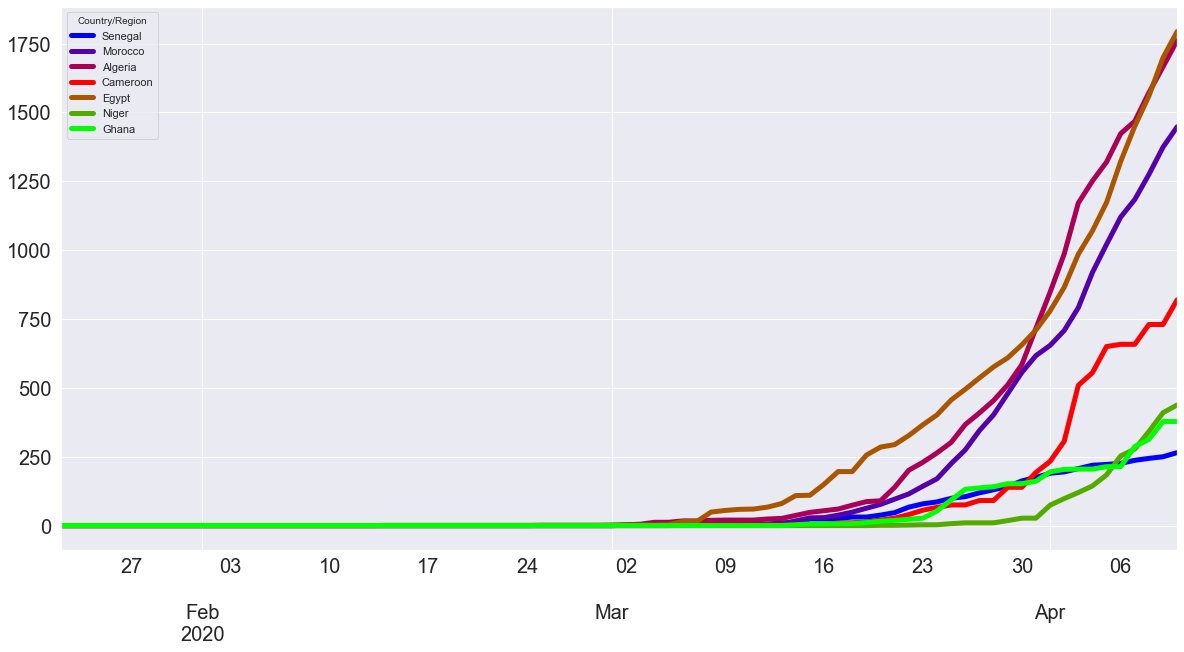

In [12]:
# Plot time series of several countries of interest
sub_country = ['Senegal', 'Morocco', 'Algeria', 'Cameroon', 'Egypt', 'Niger', 'Ghana']
confirmed_country[sub_country].plot(figsize=(20,10), linewidth=5, colormap='brg', fontsize=20);

Étiquettons nos axes et donnons un titre à la figure. Nous allons également éclaircir la ligne et ajouter des points pour les données :

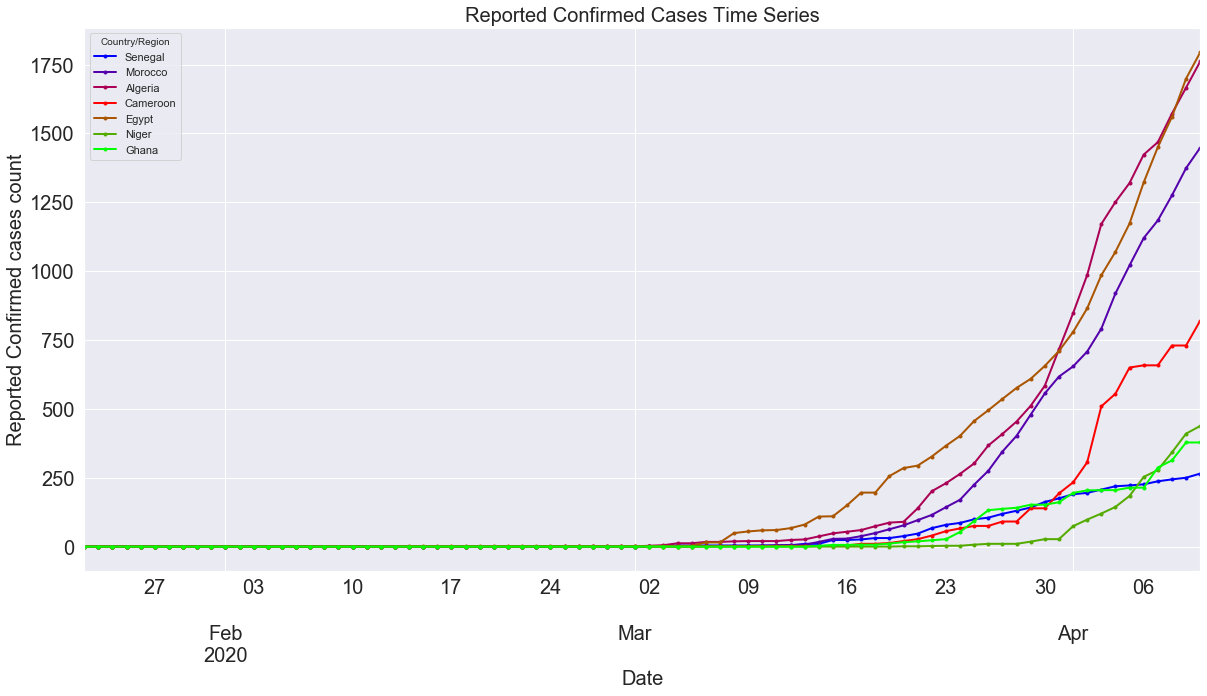

In [13]:
# Plot time series of several countries of interest
confirmed_country[sub_country].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

Recommençons, mais en rendant l'axe des y logarithmique :

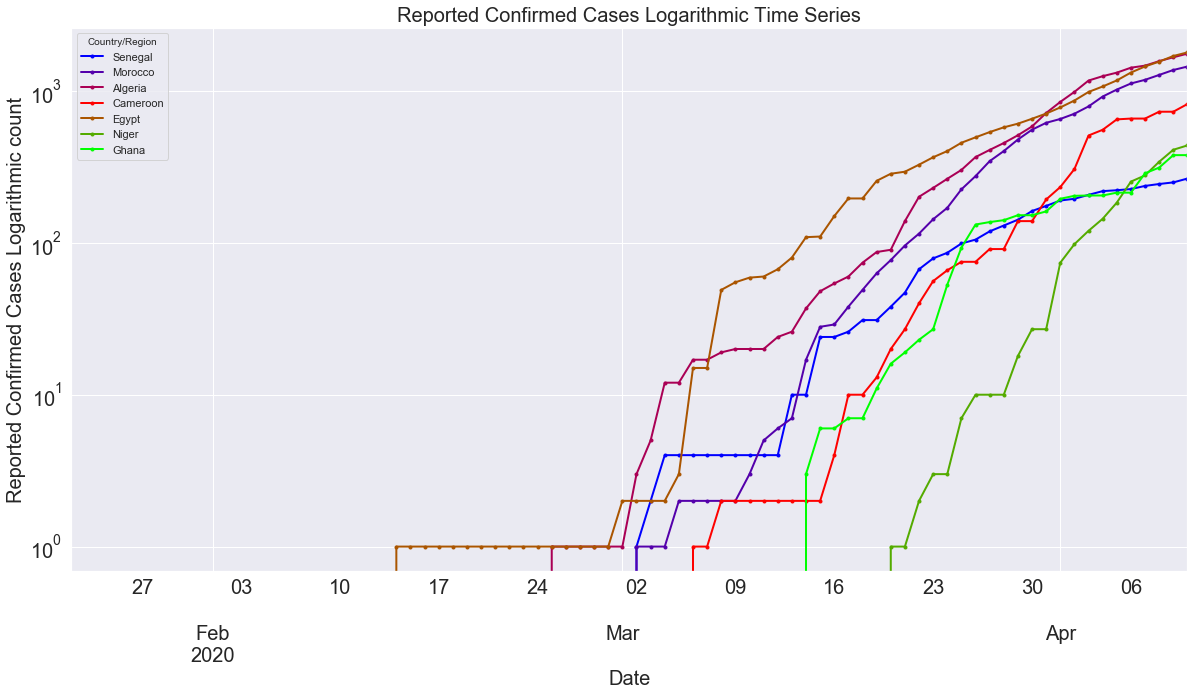

In [14]:
# Plot time series of several countries of interest
confirmed_country[sub_country].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed Cases Logarithmic count', fontsize=20);
plt.title('Reported Confirmed Cases Logarithmic Time Series', fontsize=20);

**Discuss:** Pourquoi tracer avec un logarithme de l'axe des y ? Comment interpréter le diagramme logarithmique ?

**Key points:** 
- Si une variable prend des valeurs de plusieurs ordres de grandeur (par exemple dans les 10, 100 et 1000), nous utilisons un axe logarithmique afin que les données ne soient pas toutes entassées dans une petite région de la visualisation.
- Si une courbe est approximativement linéaire sur un axe logarithmique, alors sa croissance est approximativement exponentielle et le gradien/pente de la ligne nous renseigne sur l'exposant.

**Summary:** We've 
- looked at the JHU data repository and imported the data,
- looked at the dataset containing the number of reported confirmed cases for each region,
- wrangled the data to look at the number of reported confirmed cases by country,
- plotted the number of reported confirmed cases by country (both log and semi-log),
- discussed why log plots are important for visualization and that we need to remember that we, as humans, families, communities, and society, experience COVID-19 linearly.

### Number of reported deaths

Comme nous l'avons fait ci-dessus pour `data_confirmed`, vérifions l'entete et les informations sur les données `data_deaths` :

In [15]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,6,6,7,7,11,14,14,15,15
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,15,16,17,20,20,21,22,22,23,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,58,86,105,130,152,173,193,205,235,256
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,14,15,16,17,18,21,22,23,25,26
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [16]:
data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

Il semble être structuré de manière similaire à "raw_data_confirmed". J'ai vérifié en détail et je peux confirmer que c'est le cas ! C'est une bonne conception des données, car elle permet aux utilisateurs d'explorer, d'ingurgiter et de visualiser les données d'une manière analogue à ce qui précède. Pouvez-vous vous rappeler ce que nous avons fait ? Nous

- Split-Apply-Combined it (and dropped 'Lat'/'Long'),
- Transposed it,
- Made the index a DateTimeIndex, and
- Visualized it (linear and semi-log).

Faisons maintenant les trois premières étapes ici pour `data_deaths` et voyons comment nous allons :


### Number of reported deaths by country

In [17]:
# Split-Apply-Combine
deaths_country = data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)

# Transpose
deaths_country = deaths_country.transpose()

# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index, inplace=True)

# Check out head
deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Check out the index
deaths_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

### Plotting number of reported deaths by country 

Visualisons maintenant le nombre de décès déclarés :

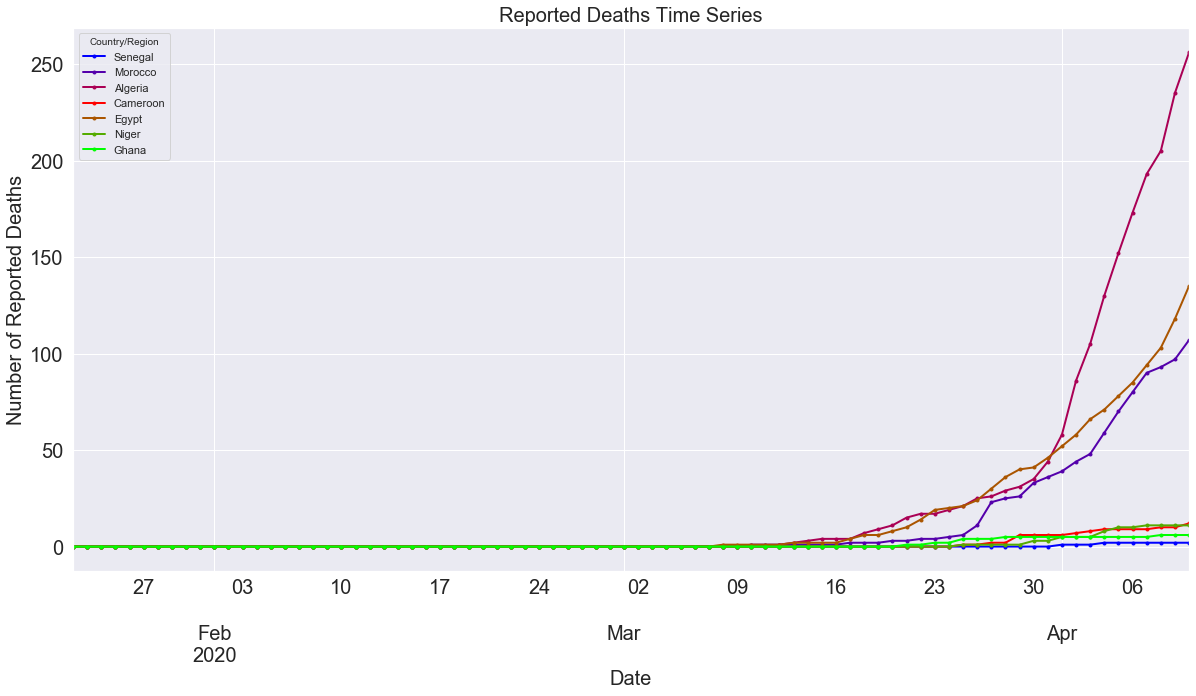

In [19]:
# Plot time series of several countries of interest
deaths_country[sub_country].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

Maintenant sur une courbe semi-logarithmique :

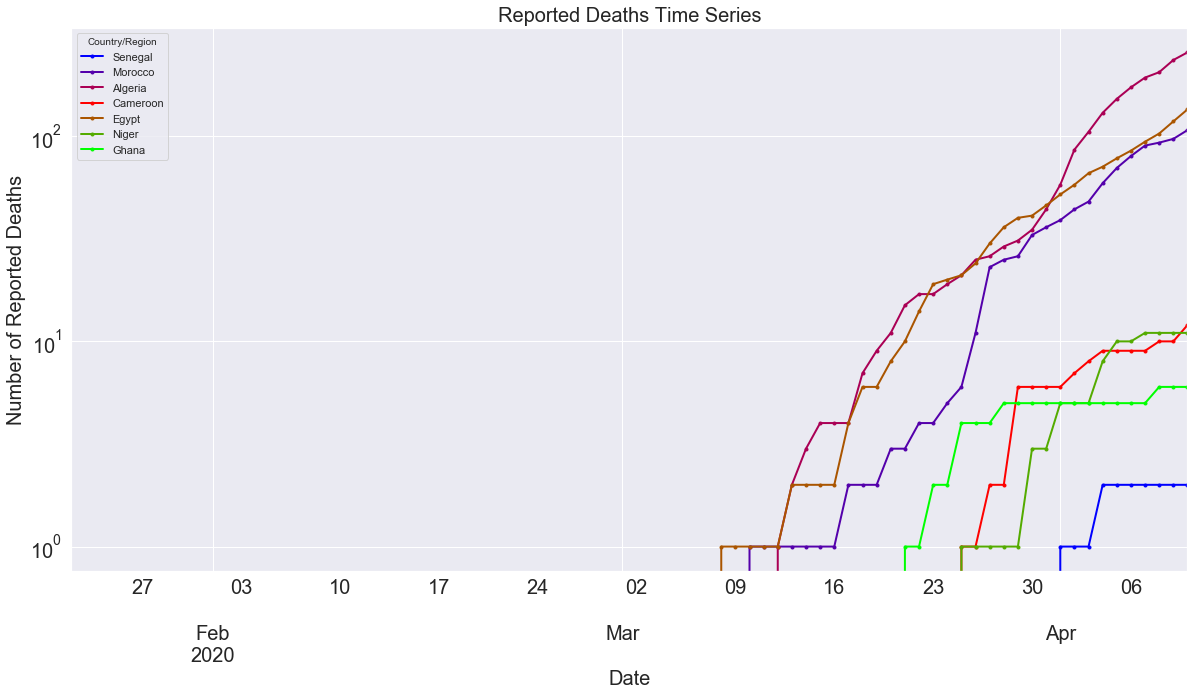

In [20]:
# Plot time series of several countries of interest
deaths_country[sub_country].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, colormap='brg', logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

### Aligning growth curves to start with day of number of known deaths ≥ 25

Pour comparer ce qui se passe dans différents pays, nous pouvons aligner les courbes de croissance de chaque pays sur toutes les courbes à partir du jour où le nombre de décès connus ≥ 25, comme indiqué dans le premier graphique [here](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html).
Pour y parvenir, commençons par fixer toutes les valeurs inférieures à 25 à NaN afin que les points de données associés ne soient pas du tout tracés lorsque nous visualisons les données :

In [21]:
# Loop over columns & set values < 25 to None
for col in deaths_country.columns:
    deaths_country.loc[(deaths_country[col] < 25),col] = None

# Check out tail
deaths_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-06,NaN,NaN,173.0,NaN,NaN,NaN,48.0,NaN,40.0,220.0,...,5385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,193.0,NaN,NaN,NaN,56.0,NaN,45.0,243.0,...,6171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-08,NaN,NaN,205.0,NaN,NaN,NaN,63.0,NaN,50.0,273.0,...,7111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-09,NaN,NaN,235.0,25.0,NaN,NaN,72.0,NaN,51.0,295.0,...,7993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-10,NaN,NaN,256.0,26.0,NaN,NaN,82.0,NaN,54.0,319.0,...,8974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Maintenant, faisons comme ci-dessus pour nous assurer que nous voyons ce que nous pensons que nous devrions voir :

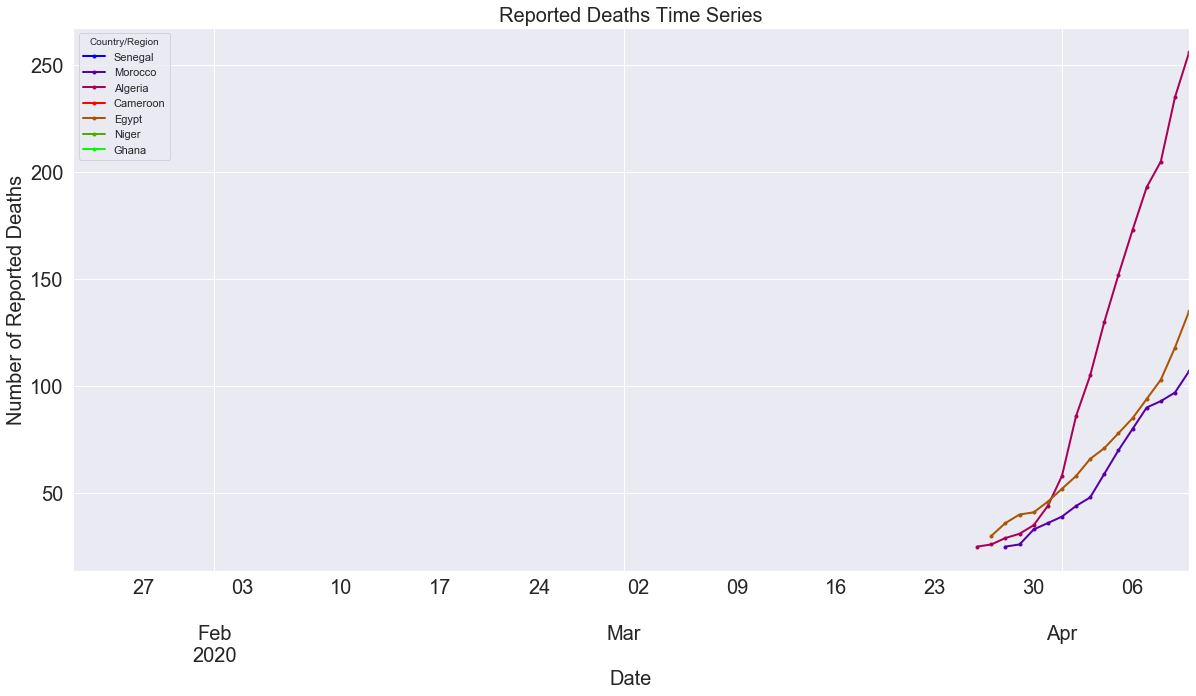

In [22]:
# Plot time series of several countries of interest
deaths_country[sub_country].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

Les pays qui ont connu moins de 25 décès au total auront maintenant des colonnes de tous les NaNs, alors laissons tomber celles-ci et voyons combien de colonnes il nous reste :

In [23]:
# Drop columns that are all NaNs (i.e. countries that haven't yet reached 25 deaths)
deaths_country.dropna(axis=1, how='all', inplace=True)
deaths_country.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2020-01-22 to 2020-04-10
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Algeria                 16 non-null     float64
 1   Andorra                 2 non-null      float64
 2   Argentina               11 non-null     float64
 3   Australia               8 non-null      float64
 4   Austria                 18 non-null     float64
 5   Bangladesh              1 non-null      float64
 6   Belgium                 22 non-null     float64
 7   Bosnia and Herzegovina  5 non-null      float64
 8   Brazil                  20 non-null     float64
 9   Bulgaria                1 non-null      float64
 10  Canada                  19 non-null     float64
 11  Chile                   7 non-null      float64
 12  China                   78 non-null     float64
 13  Colombia                8 non-null      float64
 14  Czechia                 

Comme nous allons aligner les pays à partir du jour où ils ont eu au moins 25 décès, nous n'aurons pas besoin de l'index DateTime. En fait, nous n'aurons pas du tout besoin de la date. Nous pouvons donc 
- Réinitialiser l'index, ce qui nous donnera un index ordinal (qui transforme la date en une colonne régulière) et
- Laissez tomber la colonne de la date (qui sera appelée "index") après la réinitialisation.

In [24]:
# sort index, drop date column
deaths_country_drop = deaths_country.reset_index().drop(['index'], axis=1)
deaths_country_drop.head()

Country/Region,Algeria,Andorra,Argentina,Australia,Austria,Bangladesh,Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,...,Slovenia,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Kingdom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il est maintenant temps de décaler chaque colonne pour que la première entrée soit la première valeur NaN qu'elle contient ! Pour ce faire, nous pouvons utiliser la méthode `shift()` sur chaque colonne. Mais de combien doit-on décaler chaque colonne ? L'ampleur du décalage est donnée par le nombre de NaNs qu'il y a au début de la colonne, que nous pouvons récupérer en utilisant la méthode `first_valid_index()` sur la colonne **mais** nous voulons décaler **vers le haut**, ce qui est négatif en direction (par convention et peut-être par intuition). Alors faisons-le.

In [25]:
# shift
for col in deaths_country_drop.columns:
    deaths_country_drop[col] = deaths_country_drop[col].shift(-deaths_country_drop[col].first_valid_index())
# check out head
deaths_country_drop.head()

Country/Region,Algeria,Andorra,Argentina,Australia,Austria,Bangladesh,Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,...,Slovenia,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Kingdom
0,25.0,25.0,27.0,28.0,28.0,27.0,37.0,29.0,25.0,25.0,...,28.0,28.0,25.0,27.0,26.0,25.0,30.0,28.0,27.0,56.0
1,26.0,26.0,28.0,30.0,30.0,NaN,67.0,33.0,34.0,NaN,...,30.0,35.0,36.0,28.0,27.0,25.0,37.0,36.0,32.0,56.0
2,29.0,NaN,36.0,35.0,49.0,NaN,75.0,34.0,46.0,NaN,...,36.0,54.0,62.0,41.0,30.0,NaN,44.0,40.0,37.0,72.0
3,31.0,NaN,39.0,40.0,58.0,NaN,88.0,35.0,59.0,NaN,...,40.0,55.0,77.0,54.0,32.0,NaN,59.0,47.0,38.0,138.0
4,35.0,NaN,43.0,45.0,68.0,NaN,122.0,36.0,77.0,NaN,...,43.0,133.0,105.0,75.0,33.0,NaN,75.0,54.0,45.0,178.0


Nous devons maintenant tracer nos séries chronologiques, d'abord avec des axes linéaires, puis avec des semi-logs :

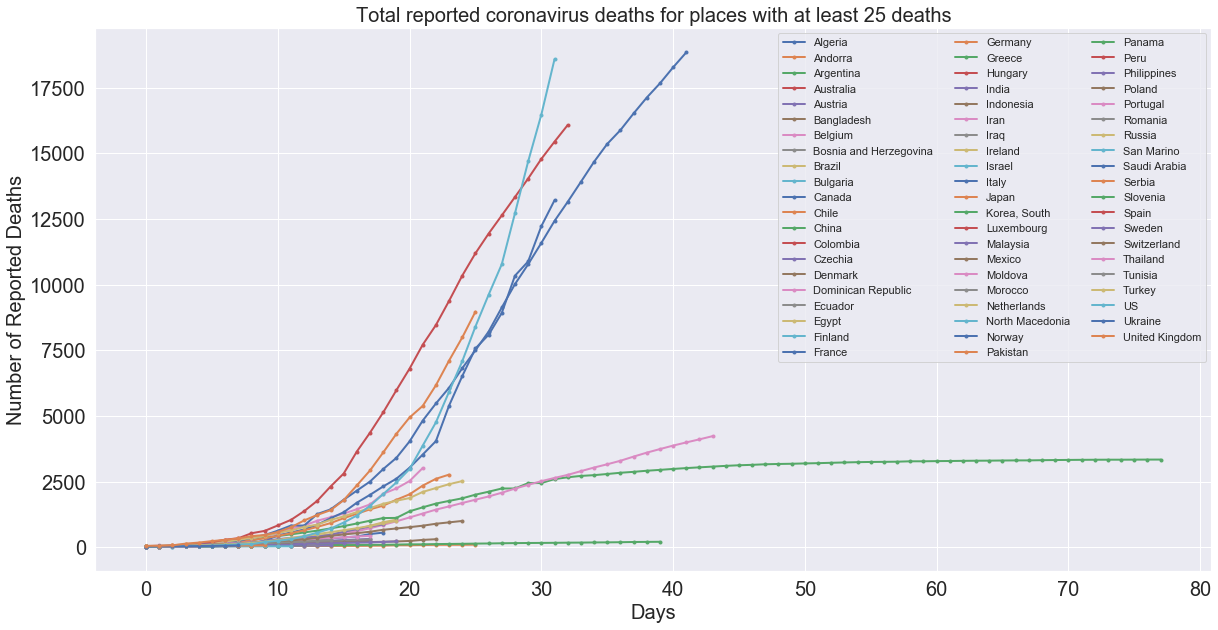

In [26]:
# Plot time series 
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

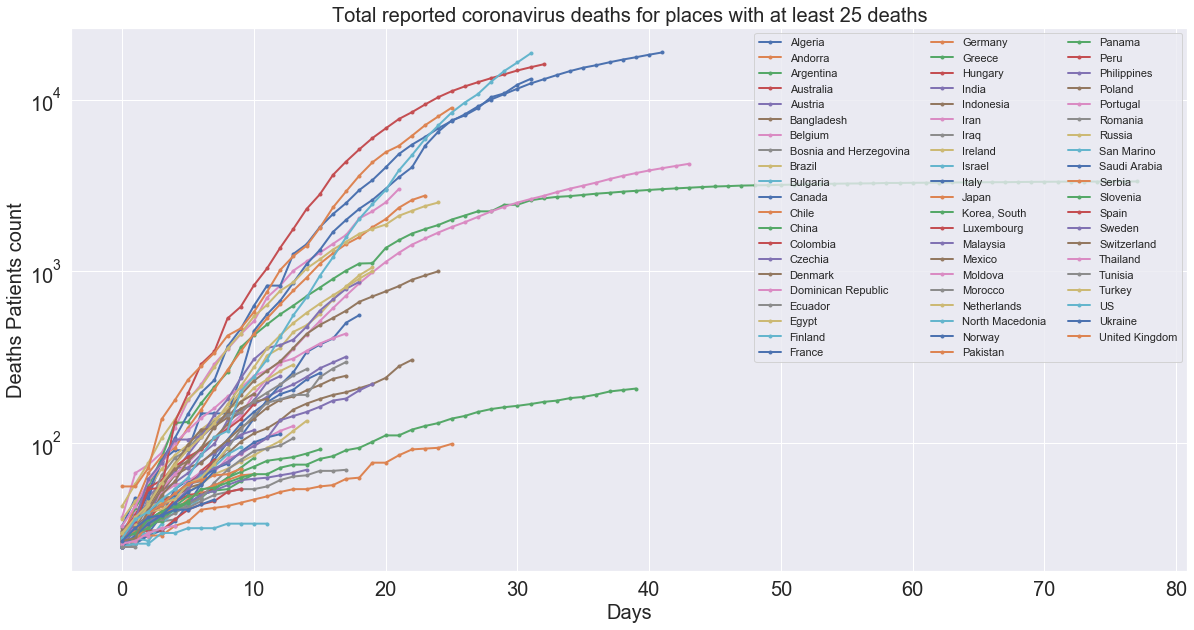

In [27]:
# Plot semi log time series 
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

**Note:** bien que nous ayons réussi à tracer ce que nous voulions, les tracés ci-dessus sont difficiles à retrouver toute information significative. Il y a trop de courbes de croissance pour qu'il y ait beaucoup de monde **et** trop de couleurs se ressemblent, il est donc difficile de dire quel pays est lequel d'après la légende. Ci-dessous, nous allons tracer moins de courbes et plus bas dans le notebook, nous utiliserons le package python Altair pour introduire de l'interactivité dans la représentation graphique.

**Summary:** We've 
- looked at the dataset containing the number of reported deaths for each region,
- wrangled the data to look at the number of reported deaths by country,
- plotted the number of reported deaths by country (both log and semi-log),
- aligned growth curves to start with day of number of known deaths ≥ 25.

### Plotting number of recovered people

Le troisième ensemble de données dans le dépôt Hopkins est le nombre de cas guérrit. Nous voulons procéder à des échanges de données similaires à ceux des deux cas ci-dessus afin de *pouvoir* copier et coller notre code à nouveau *mais*, si vous écrivez le même code trois fois, il est probablement temps d'écrire une fonction.

In [28]:
# Function for grouping countries by region
def group_by_country(data):
    """Returns data for countries indexed by date"""
    # Group by
    data = data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [29]:
# Function to align growth curves
def align_curves(data, min_val):
    """Align growth curves  to start on the day when the number of known deaths = min_val"""
    # Loop over columns & set values < min_val to None
    for col in data.columns:
        data.loc[(data[col] < min_val),col] = None
    # Drop columns with all NaNs
    data.dropna(axis=1, how='all', inplace=True)
    # Reset index, drop date
    data = data.reset_index().drop(['index'], axis=1)
    # Shift each column to begin with first valid index
    for col in data.columns:
        data[col] = data[col].shift(-data[col].first_valid_index())
    return data

In [30]:
# Function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Plot time series and make looks a bit nice"""
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

For a sanity check, let's see these functions at work on the 'number of deaths' data:

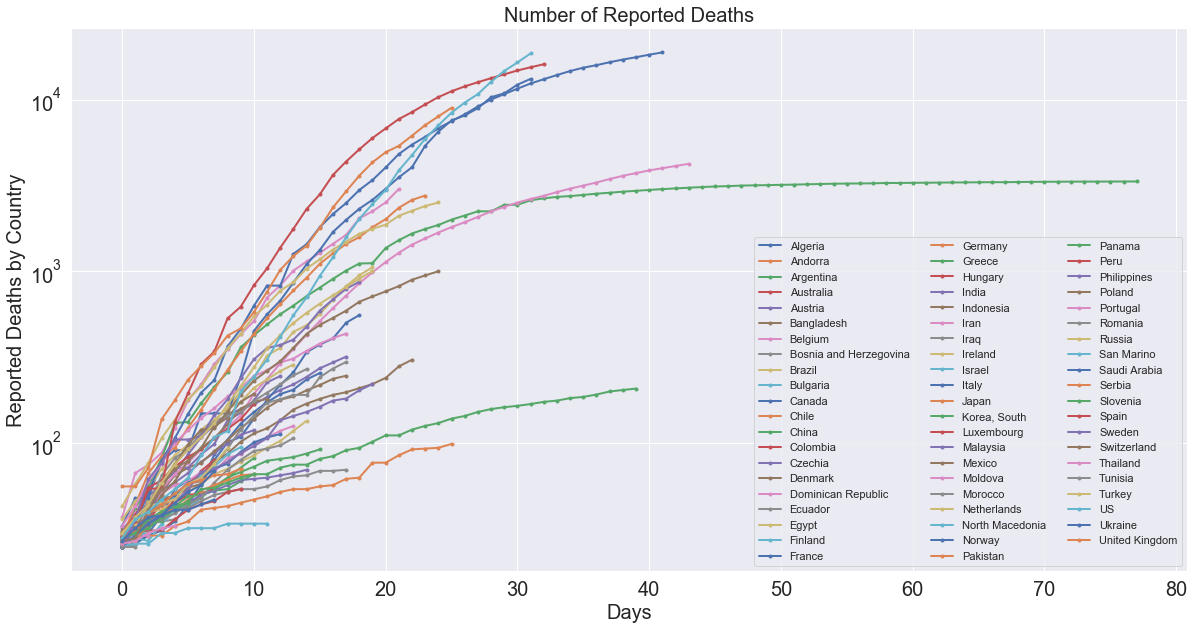

In [31]:
deaths_country_drop = group_by_country(data_deaths)
deaths_country_drop = align_curves(deaths_country_drop, min_val=25)
plot_time_series(deaths_country_drop, 'Number of Reported Deaths', 'Days', 'Reported Deaths by Country', logy=True)

Now let's check use our functions to group, wrangle, and plot the recovered patients data:

In [32]:
# group by country and check out tail
recovered_country = group_by_country(data_recovered)
recovered_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-06,18,116,90,31,2,0,325,62,1080,3463,...,287,104,30,65,95,24,0,0,5,0
2020-04-07,18,131,113,39,2,0,338,87,1080,4046,...,325,150,30,65,123,42,0,0,7,0
2020-04-08,29,154,237,52,2,0,358,114,1080,4512,...,345,150,30,65,126,44,0,0,7,0
2020-04-09,32,165,347,58,2,0,365,138,1472,5240,...,359,192,38,84,128,44,0,0,24,0
2020-04-10,32,182,405,71,2,0,375,149,1793,6064,...,588,206,42,84,144,45,0,0,25,0


In [33]:
# align curves and check out head
recovered_country_drop = align_curves(recovered_country, min_val=25)
recovered_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia
0,29.0,31.0,32.0,26.0,52.0,28.0,26.0,112.0,26.0,35.0,...,105.0,25.0,26.0,53.0,41.0,25.0,31.0,25.0,25.0,25.0
1,32.0,31.0,32.0,31.0,52.0,30.0,26.0,225.0,26.0,35.0,...,121.0,28.0,31.0,67.0,41.0,25.0,39.0,55.0,NaN,NaN
2,32.0,33.0,32.0,39.0,63.0,30.0,26.0,225.0,26.0,44.0,...,147.0,28.0,31.0,67.0,62.0,25.0,39.0,58.0,42.0,NaN
3,NaN,44.0,65.0,52.0,72.0,30.0,88.0,479.0,26.0,44.0,...,176.0,28.0,38.0,67.0,68.0,30.0,39.0,63.0,44.0,NaN
4,NaN,52.0,65.0,58.0,72.0,30.0,88.0,636.0,32.0,60.0,...,178.0,35.0,38.0,67.0,93.0,30.0,39.0,75.0,44.0,NaN


Plot time series:

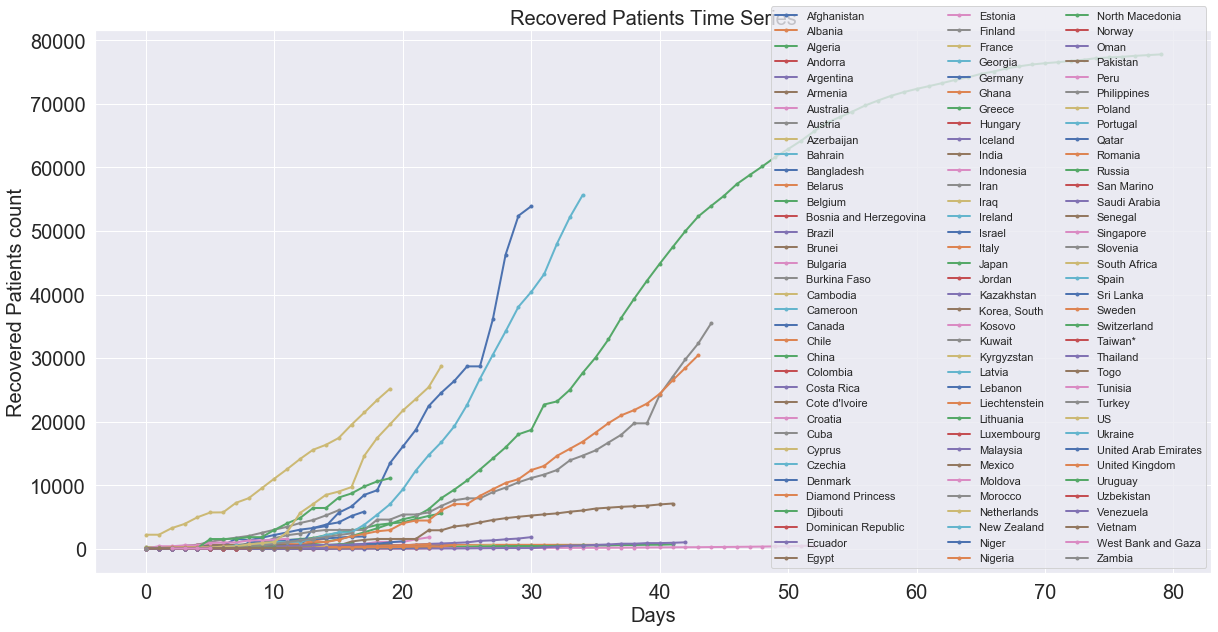

In [34]:
plot_time_series(recovered_country_drop, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count')

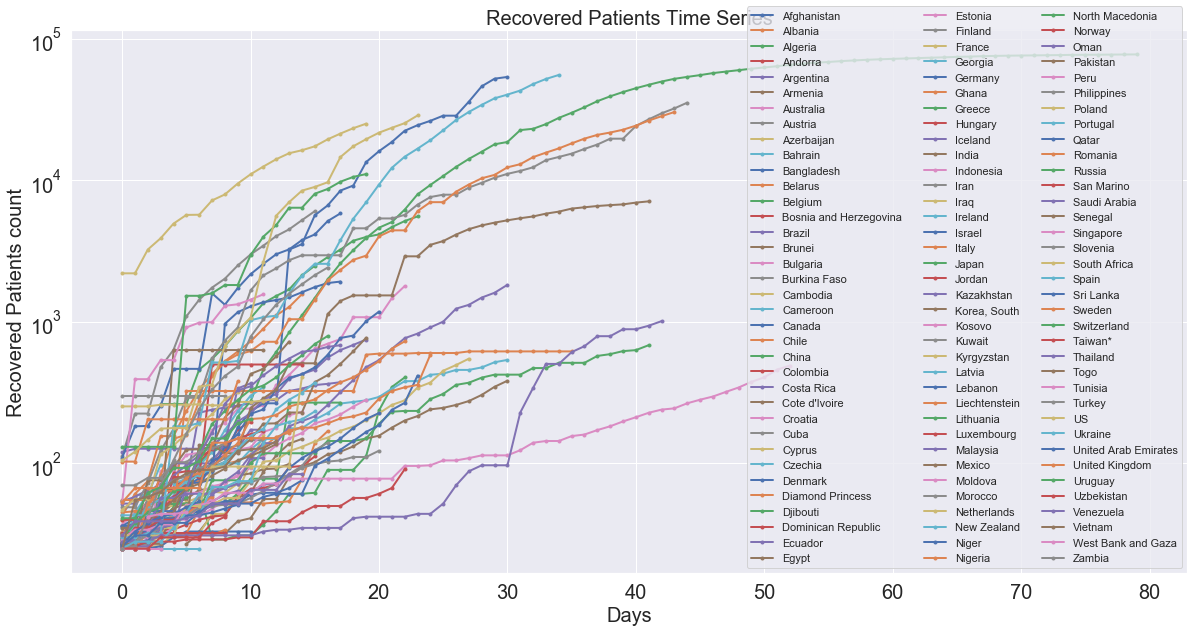

In [35]:
plot_time_series(recovered_country_drop, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)

**Note:** once again,  the above plots are challenging to retrieve any meaningful information from. There are too many growth curves so that it's very crowded **and** too many colours look the same so it's difficult to tell which country is which from the legend. Let's plot less curves and in the next section we'll use the python package Altair to introduce interactivity into such a plot in order to deal with this challenge.

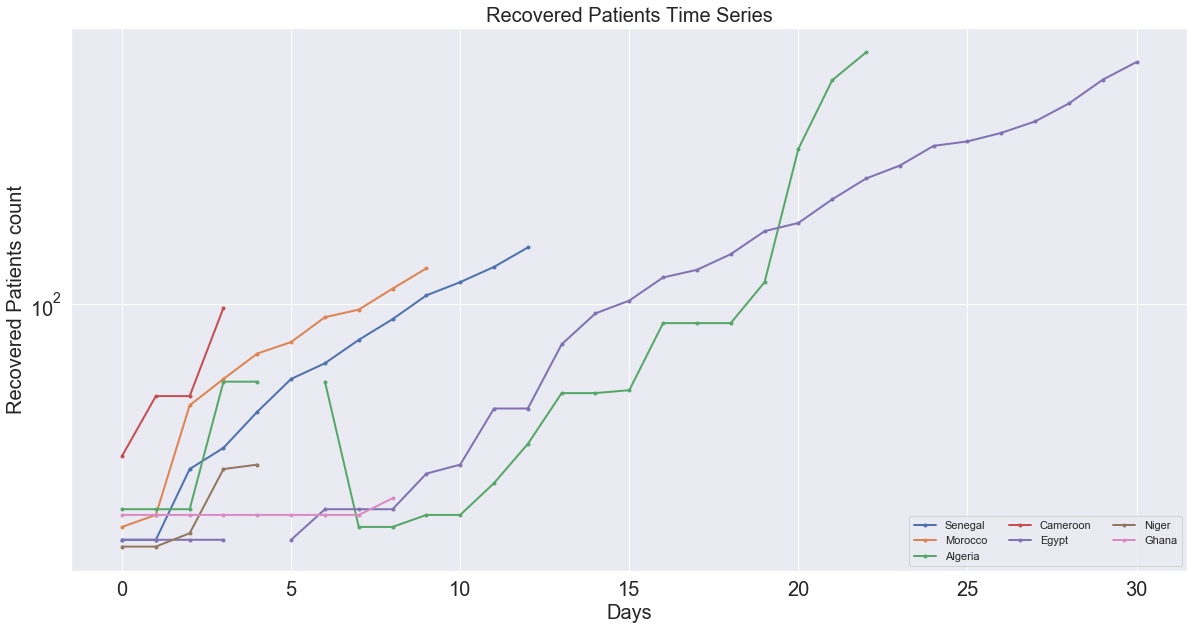

In [36]:
plot_time_series(recovered_country_drop[sub_country], 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)

**Summary:** We've 
- looked at the dataset containing the number of reported recoveries for each region,
- written function for grouping, wrangling, and plotting the data,
- grouped, wrangled, and plotted the data for the number of reported recoveries.

## Interactive plots with altair

We're now going to build some interactive data visualizations. I was recently inspired by [this one in the NYTimes](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html), a chart of confirmed number of deaths by country for places with at least 25 deaths, similar to ours above, but with informative hover tools. [This one](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html) is also interesting.

We're going to use a tool called [Altair](https://altair-viz.github.io/). I like Altair for several reasons, including precisely what they state on their website:

> With Altair, you can spend more time understanding your data and its meaning. Altair’s API is simple, friendly and consistent and built on top of the powerful [Vega-Lite](https://vega.github.io/vega-lite/) visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code.

Before jumping into Altair, let's reshape our `deaths_country` dataset. Notice that it's currently in **wide data format**, with a column for each country and a row for each "day" (where day 1 is the first day with over 25 confirmed deaths). 

In [37]:
# Look at head
deaths_country_drop.head()

Country/Region,Algeria,Andorra,Argentina,Australia,Austria,Bangladesh,Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,...,Slovenia,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Kingdom
0,25.0,25.0,27.0,28.0,28.0,27.0,37.0,29.0,25.0,25.0,...,28.0,28.0,25.0,27.0,26.0,25.0,30.0,28.0,27.0,56.0
1,26.0,26.0,28.0,30.0,30.0,NaN,67.0,33.0,34.0,NaN,...,30.0,35.0,36.0,28.0,27.0,25.0,37.0,36.0,32.0,56.0
2,29.0,NaN,36.0,35.0,49.0,NaN,75.0,34.0,46.0,NaN,...,36.0,54.0,62.0,41.0,30.0,NaN,44.0,40.0,37.0,72.0
3,31.0,NaN,39.0,40.0,58.0,NaN,88.0,35.0,59.0,NaN,...,40.0,55.0,77.0,54.0,32.0,NaN,59.0,47.0,38.0,138.0
4,35.0,NaN,43.0,45.0,68.0,NaN,122.0,36.0,77.0,NaN,...,43.0,133.0,105.0,75.0,33.0,NaN,75.0,54.0,45.0,178.0


For Altair, we'll want to convert the data into **long data format**. What this will do essentially have a row for each country/day pair so our columns will be 'Day', 'Country', and number of 'Deaths'. We do this using the dataframe method `.melt()` as follows:

In [38]:
# create long data for deaths
deaths_long = deaths_country_drop.reset_index().melt(id_vars='index', value_name='Deaths').rename(columns={'index':'Day'})
deaths_long.head()

,Day,Country/Region,Deaths
0,0,Algeria,25.0
1,1,Algeria,26.0
2,2,Algeria,29.0
3,3,Algeria,31.0
4,4,Algeria,35.0


Now having transformed our data, let's import Altair and get a sense of its API.

In [39]:
import altair as alt

# altair plot 
alt.Chart(deaths_long).mark_line().encode(
    x='Day',
    y='Deaths',
    color='Country/Region')

alt.Chart(...)

It is nice to be able to build such an informative and elegant chart in four lines of code (which is also elegant). And, looking at the simplicity of the code we just wrote, we can see why it was great to have long data: a column for each variable allowed us to explicitly and easily tell Altair what we wanted on each axis and what we wanted for the colour.

> The key idea is that you are declaring links between *data columns* and *visual encoding channels*, such as the x-axis, y-axis, color, etc. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated plots and visualizations can be created using a relatively concise grammar.

We can now customize the code to thicken the line width, to alter the opacity, and to make the chart larger:

In [40]:
# altair plot 
alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x='Day',
    y='Deaths',
    color='Country/Region'
).properties(
    width=800,
    height=650
)

alt.Chart(...)

We can also add a log y-axis. To do this, The long-form, we express the types using the long-form `alt.X('Day',...)`, which is, in the words of the [Altair documentation](https://altair-viz.github.io/user_guide/encoding.html)
> useful when doing more fine-tuned adjustments to the encoding, such as binning, axis and scale properties, or more.

We'll also now add a hover tooltip so that, when we hover our cursor over any point on any of the lines, it will tell us the 'Country', the 'Day', and the number of 'Deaths'.

In [41]:
# altair plot 
alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)


alt.Chart(...)

It's great that we could add that useful hover tooltip with one line of code `tooltip=['Country/Region', 'Day','Deaths']`, particularly as it adds such information rich interaction to the chart.
One useful aspect of the NYTimes chart was that, when you hovered over a particular curve, it made it stand out against the other. We're going to do something similar here: in the resulting chart, when you click on a curve, the others turn grey.

**Note:** When first attempting to build this chart, I discovered [here](https://github.com/altair-viz/altair/issues/1552) that "multiple conditional values in one encoding are not allowed by the Vega-Lite spec," which is what Altair uses. For this reason, we build the chart, then an overlay, and then combine them.

In [42]:
# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
    color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# Sum em up!
chart + overlay

alt.LayerChart(...)

It's not super easy to line up the legend with the curves on the chart so let's put the labels on the chart itself.

In [43]:
# drop NaNs
deaths_long = deaths_long.dropna()

# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color=alt.Color('Country/Region', legend=None),
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
  color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# Text labels
text = base.mark_text(
    align='left',
    dx=5,
    size=10
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Day')),
    y=alt.Y('Deaths', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Reported Deaths')),
    text='Country/Region',  
).transform_filter(
    selection
)

# Sum em up!
chart + overlay + text

alt.LayerChart(...)